In [2]:
%load_ext autoreload
%autoreload 2

# Geospatial model

In [3]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [4]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [5]:
from seminartools.models.distance_model import DistanceModel

model = DistanceModel()
model

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
model.fit(df)

Creating regression coefficients: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


In [7]:
import arviz as az

az.summary(model.trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ls_log__,5.275,0.224,4.856,5.686,0.002,0.001,12318.0,3646.0,1.0
intercepts_rotated_[0],-0.317,0.073,-0.455,-0.183,0.001,0.001,8977.0,5370.0,1.0
intercepts_rotated_[1],0.061,0.062,-0.061,0.173,0.001,0.001,9057.0,5017.0,1.0
intercepts_rotated_[2],0.067,0.121,-0.149,0.293,0.001,0.001,9120.0,4894.0,1.0
intercepts_rotated_[3],0.152,0.064,0.032,0.270,0.001,0.000,14481.0,4755.0,1.0
...,...,...,...,...,...,...,...,...,...
regression_coefficients_inflation_lag_1[15],0.009,0.105,-0.194,0.200,0.001,0.001,8226.0,5134.0,1.0
regression_coefficients_inflation_lag_1[16],0.420,0.089,0.261,0.590,0.001,0.001,8375.0,4977.0,1.0
regression_coefficients_inflation_lag_1[17],0.109,0.130,-0.126,0.355,0.001,0.001,12439.0,4704.0,1.0
regression_coefficients_inflation_lag_1[18],0.224,0.135,-0.032,0.471,0.001,0.001,9129.0,4730.0,1.0


In [8]:
x = az.summary(model.trace)
# all index starting with interceps
x = x[x.index.str.startswith("intercepts[")]
x

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],-0.317,0.073,-0.455,-0.183,0.001,0.001,8977.0,5370.0,1.0
intercepts[1],0.061,0.062,-0.061,0.173,0.001,0.001,9057.0,5017.0,1.0
intercepts[2],0.090,0.063,-0.031,0.204,0.001,0.001,7830.0,5192.0,1.0
intercepts[3],0.152,0.064,0.032,0.270,0.001,0.000,14481.0,4755.0,1.0
intercepts[4],-0.035,0.070,-0.166,0.093,0.001,0.001,16361.0,4516.0,1.0
intercepts[5],-0.586,0.154,-0.871,-0.296,0.004,0.003,1372.0,2431.0,1.0
intercepts[6],-0.110,0.085,-0.275,0.043,0.001,0.001,8265.0,5189.0,1.0
intercepts[7],-0.257,0.097,-0.438,-0.073,0.001,0.001,5269.0,5156.0,1.0
intercepts[8],-0.217,0.083,-0.368,-0.054,0.001,0.001,11239.0,4802.0,1.0
intercepts[9],-0.187,0.082,-0.345,-0.032,0.001,0.001,8114.0,5330.0,1.0


Text(0.5, 1.0, 'Regression intercept per country')

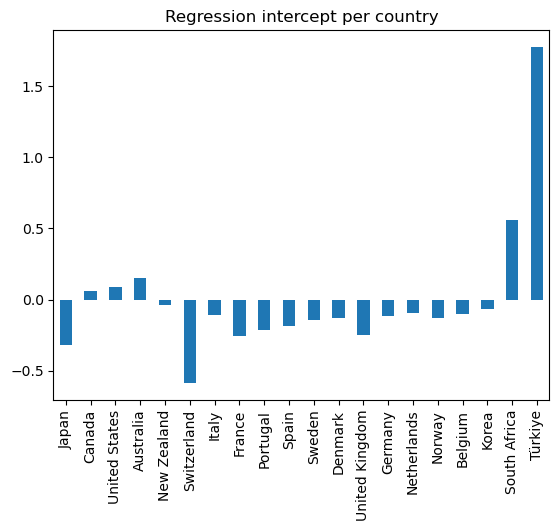

In [9]:
import matplotlib.pyplot as plt
x.set_index(model.countries)["mean"].plot.bar()
plt.title("Regression intercept per country")

# Prediction

In [10]:
preds = model.predict(df)
preds

,country,inflation,date
0,Australia,0.015449,2023-04-01
1,Belgium,0.016145,2023-04-01
2,Canada,0.006618,2023-04-01
3,Denmark,0.007561,2023-04-01
4,France,0.005361,2023-04-01
5,Germany,0.012186,2023-04-01
6,Italy,0.023127,2023-04-01
7,Japan,0.004861,2023-04-01
8,Korea,0.005998,2023-04-01
9,Netherlands,0.008634,2023-04-01


Distribution forecast

In [1]:
predsDistribution = model.predict(df,aggregation_method="distribution")
predsDistribution

NameError: name 'model' is not defined

In [11]:
import matplotlib.pyplot as plt
import numpy as np

country = predsDistribution.iloc[0]["country"]
density = predsDistribution.iloc[0]["inflation"]

inflation_grid = density["inflation_grid"]
pdf_values = density["pdf"]

plt.plot(
    inflation_grid,
    pdf_values,
    )
plt.title(f"Density {country}")


NameError: name 'predsDistribution' is not defined